# Tutorial notebook

This notebook shows:
- how to use main user functions to manipulate the datasets
- familiarize the participants with the use case
- provide some tools to visulaize the use case data

### Prerequisites
Install the dependencies if it is not already done. For more information look at the [readme](../README.md) file.

##### For development on Local Machine

In [2]:
### Install a virtual environment
# Option 1:  using conda (recommended)
# !conda create -n venv python=3.12
# !conda activate venv

# Option 2: using virtualenv
# !pip install virtualenv
# !virtualenv -p /usr/bin/python3.12 venv
# !source venv_lips/bin/activate

### Install the welding challenge package
# Option 1: Get the last version from Pypi
# !pip install 'challenge_welding'

# Option 2: Get the last version from github repository
# !git clone https://github.com/XX
# !pip install -U .

##### For Google Colab Users
You could also use a GPU device from Runtime > Change runtime type and by selecting T4 GPU.

In [3]:
### Install the welding challenge package
# Option 1: Get the last version of challenge welding package framework from PyPI (Recommended)
# !pip install 'challenge-welding'

In [4]:
# Option 2: Get the last version from github repository
# !git clone https://github.com/confianceai/Challenge-Welding-Starter-Kit
# !pip install -U .

Attention: You may restart the session after this installation, in order that the changes be effective.

In [5]:
# Clone the starting kit
# !git clone https://github.com/confianceai/Challenge-Welding-Starter-Kit.git
# and change the directory to the starting kit to be able to run correctly this notebook
# import os
# os.chdir("Challenge-Welding-Starter-Kit")

## Introduction: What is the Welding Quality Detection?

In the highly competitive automotive industry, quality control is essential to ensure the reliability of vehicles and user safety. A failure in quality control can severely jeopardize safety, result in significant financial costs, and cause substantial reputational damage to the company involved.

One of the challenges for Renault is to improve the reliability of quality control for welding seams in automotive body manufacturing. Currently, this inspection is consistently performed by a human operator due to the legal dimension related to user safety. During an industrial process, this task is resource-consuming. The key challenge is to develop an AI-based solution that reduces the number of inspections required by the operator through automated pre-validation.

See an example of welding below:

<div>
<img src="../docs/imgs/hero_image_3D.png" width="500"/>
</div>


Within the [Confiance.ai](https://www.confiance.ai/) Research Program, Renault Group and SystemX worked jointly on the development of trustworthy AI components tackling this problem. Now part of the [European Trustworthy Foundation (ETF)](https://www.confiance.ai/foundation/), we want to ensure that these tools effectively validate the proposed AI models according to the trustworthy criteria defined by the industry (Intended Purpose).

This industrial use case, provided by Renault Group, represents the “Visual Inspection” thematic through a classification problem.

The goal is to be able to assess weld quality from a photo taken by cameras on vehicle production lines.

A weld can have two distinct states:
- OK: The welding is normal.
- KO: The welding has defects.

Here is below some examples of weldings `OK` and `KO` on two different welding seams `c10` and `c19`.

<div>
<img src="../docs/imgs/welding_examples.png" width="500"/>
</div>

The main objective of the challenge is to **create an AI component (see [Notebook 3](03-Evaluate_solution.ipynb)) that will assist an operator in performing weld classification while minimizing the need for the operator to inspect the images and double-check the classifications**.

For defect identification ("KO"), the system should provide the operator with relevant information on the location of the detected defect in the image, hence reducing the control task duration.

## Load and manipulate the data

In [6]:
"""
This script is a tutorial example of how to use of ChallengeWelding-UI functions
"""
import sys
# sys.path.insert(0, "..") # Uncomment this line For local tests without pkg installation, to make challenge_welding module visible 
from challenge_welding.user_interface import ChallengeUI
from matplotlib import pyplot as plt

### Init the user interface and list available datasets
The dataset contains 22,851 images split among three different welding seams. An important property of this dataset is that it is highly unbalanced. There are only 500 KO images in the entire dataset. *A dataset is considered as a list of sample. In this challenge , a sample is a single image.*

We start by listing the available datasets:
- `example_mini_dataset`: a demo version of the complete dataset used for demonstration and including 2857 images.
- `welding-detection-challenge-dataset`: the complete dataset which should be used by the participants including 22,851 images. 

See [this doc](../docs/Dataset_description.md) for more information concerning the dataset and their properties.

In [7]:
# Initiate the user interface
my_challenge_UI=ChallengeUI(cache_strategy="local",cache_dir="notebooks_cache")

# Get list of available datasets
ds_list=my_challenge_UI.list_datasets()
print(ds_list)

['example_mini_dataset', 'welding-detection-challenge-dataset']


### Display the dataset metadata
Create a pandas dataframe containing metadata of all samples. 

In [8]:
# We choose here the dataset named "example_mini_dataset"
ds_name="example_mini_dataset"

# the complete dataset
# ds_name="welding-detection-challenge-dataset"

# Load all metadata of your dataset as a pandas dataframe
meta_df=my_challenge_UI.get_ds_metadata_dataframe(ds_name)

display(meta_df)

https://minio-storage.apps.confianceai-public.irtsysx.fr/challenge-welding/datasets/example_mini_dataset/metadata/ds_meta.parquet


,sample_id,class,timestamp,welding-seams,labelling_type,resolution,path,sha256,storage_type,data_origin,blur_level,blur_class,luminosity_level,external_path
0,data_92409,OK,22/01/20 12:49,c33,expert,"[1920, 1080]",challenge-welding/datasets/example_mini_datase...,b'GN\xd7\xa7B\x98\xb0r\xa4\xdfn\x8cT\x8e:\xc07...,s3,real,701.938341,blur,50.533365,http://minio-storage.apps.confianceai-public.i...
1,data_67943,OK,20/02/20 23:53,c102,expert,"[1920, 1080]",challenge-welding/datasets/example_mini_datase...,b's\xf6;3i-\x10\xfd8y\xf2\xe1\xa6JQ\x84`\xc6\x...,s3,real,715.670702,blur,47.050604,http://minio-storage.apps.confianceai-public.i...
2,data_4843,OK,20/01/20 20:34,c20,expert,"[1920, 1080]",challenge-welding/datasets/example_mini_datase...,b'\xdbZ\xb3\x12e&\xd5\x83\x13*\x87S\xe1\x19\xc...,s3,real,715.857380,blur,46.204245,http://minio-storage.apps.confianceai-public.i...
3,data_25309,OK,18/07/2022 20:18,c102,operator,"[960, 540]",challenge-welding/datasets/example_mini_datase...,b'/c\xe3\xd9\xc8|&\xaf\xb1}\xf6\xe3s\xae\xea\x...,s3,real,869.513006,blur,34.359280,http://minio-storage.apps.confianceai-public.i...
4,data_76144,OK,03/10/19 21:14,c20,expert,"[1920, 1080]",challenge-welding/datasets/example_mini_datase...,b'\xca%\x0c\x92\x1f\x0c\x00\xcc\x02\r\xb8\xf1\...,s3,real,2676.246904,clean,46.256244,http://minio-storage.apps.confianceai-public.i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,data_41485,OK,26/07/2022 00:51,c33,operator,"[960, 540]",challenge-welding/datasets/example_mini_datase...,b'\tK\x04\xf1h\x19:\xcd\xe1\xbc\xe6\xd2\xb6\x0...,s3,real,2158.350896,clean,46.735307,http://minio-storage.apps.confianceai-public.i...
2853,data_79596,OK,15/07/20 08:27,c20,expert,"[1920, 1080]",challenge-welding/datasets/example_mini_datase...,b'\xf0\xd9\x9f\x16]\xacXY\xb5\x06rpv/\xbf\xc2\...,s3,real,2314.094661,clean,47.251992,http://minio-storage.apps.confianceai-public.i...
2854,data_26044,OK,21/07/2022 14:25,c102,operator,"[960, 540]",challenge-welding/datasets/example_mini_datase...,b'\x8c\r\x83\xeb\xf8\x93\xd9\x1a\xda\xea\xa8*\...,s3,real,976.539956,clean,41.172945,http://minio-storage.apps.confianceai-public.i...
2855,data_22918,OK,04/07/2022 09:49,c102,operator,"[960, 540]",challenge-welding/datasets/example_mini_datase...,b'\x87V[\x00\xe6\x11L\x02\xca/\x9d\xa6\xf9ih\x...,s3,real,853.770358,blur,38.830967,http://minio-storage.apps.confianceai-public.i...


### Exploration of dataset properties




You may want to see the different type resolution of image in the dataset

In [9]:
meta_df["resolution"]=meta_df["resolution"].astype(str)
meta_df["resolution"].value_counts()

resolution
[1920 1080]    1887
[960 540]       970
Name: count, dtype: int64

With this dataframe you can explore, and draw statistics. For example, you can compute the repartition of weld class

In [10]:
meta_df["class"].value_counts()

class
OK    2797
KO      60
Name: count, dtype: int64

You may  want to see the class distribution for each welding-seams , or the blur distributoin

In [11]:
meta_df.groupby(["welding-seams","class"]).count()["sample_id"]

welding-seams  class
c102           KO         19
               OK       1105
c20            KO         28
               OK        588
c33            KO         13
               OK       1104
Name: sample_id, dtype: int64

In [12]:
meta_df.groupby(["welding-seams","blur_class"]).count()["sample_id"]

welding-seams  blur_class
c102           blur          458
               clean         666
c20            blur           39
               clean         577
c33            blur          393
               clean         724
Name: sample_id, dtype: int64

Or you may want ot see the distribiution of blur level and luminosity overs each welding-seams

In [13]:
meta_df.groupby(["welding-seams"])[["blur_level","luminosity_level"]].describe()

blur_level                                                     \
                   count         mean          std         min          25%   
welding-seams                                                                 
c102              1124.0  1646.708814  1000.974010  232.164523   840.220943   
c20                616.0  2281.076693   925.798240  165.989551  1636.107047   
c33               1117.0  1292.783950   664.498541   23.230028   633.210488   

                                                     luminosity_level  \
                       50%          75%          max            count   
welding-seams                                                           
c102           1153.824661  2343.830183  5465.023695           1124.0   
c20            2235.884592  2943.441203  5485.306650            616.0   
c33            1511.528586  1863.298352  2688.801282           1117.0   

                                                                     \
                    mean       std        min        25%        50%   
welding-seams                                                         
c102           39.347707  4.291896  31.582400  35.838190  39.246960   
c20            47.190433  1.360441  43.637326  46.411531  47.126434   
c33            45.477640  5.549579  13.712589  40.775487  46.498776   

                                     
                     75%        max  
welding-seams                        
c102           42.674064  50.753189  
c20            47.838863  53.438949  
c33            49.971329  56.255740

## Display an image
### Open an image
In this section we open a specific sample from the dataset, and display it

In [14]:
sample_idx=56 # idx of tested image in the dataset.
sample_meta=meta_df.iloc[sample_idx] # Get medata of image at index sample_idx

print("opening image metadata with idx ..", sample_idx)
print(sample_meta.to_dict())

img=my_challenge_UI.open_image(sample_meta["path"]) # Always Use external_path of sample to open the image

print("size of the opened image", img.shape)

opening image metadata with idx .. 56
{'sample_id': 'data_95072', 'class': 'OK', 'timestamp': '08/09/20 08:05', 'welding-seams': 'c33', 'labelling_type': 'expert', 'resolution': '[1920 1080]', 'path': 'challenge-welding/datasets/example_mini_dataset/c33/expert/sample_56.jpeg', 'sha256': b"\x8a\xb055\x9bz\x89\x17\tz\xff+\x86\x85$\x08-\xaf'&\xa7\xb1\x90\xe2S\x89\xd3*d2\x1b\xfd", 'storage_type': 's3', 'data_origin': 'real', 'blur_level': 1693.360711, 'blur_class': 'clean', 'luminosity_level': 39.23867707576858, 'external_path': 'http://minio-storage.apps.confianceai-public.irtsysx.fr/challenge-welding/datasets/example_mini_dataset/c33/expert/sample_56.jpeg'}
size of the opened image (1080, 1920, 3)


### Display the image
We can simply visualize the opened the image using `matplotlib` library.

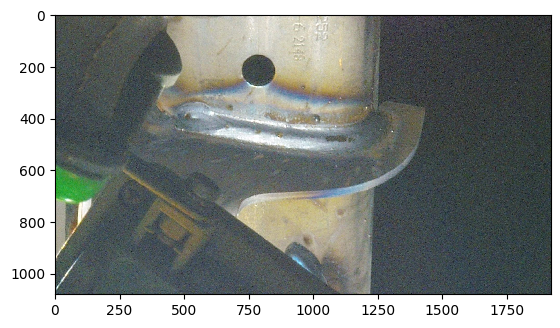

In [15]:
plt.imshow(img, interpolation='nearest')
plt.show()

You can also the already provided `display_image` function to display directly the required sample

opening image metadata with idx .. 129
{'sample_id': 'data_4990', 'class': 'KO', 'timestamp': '29/02/20 09:33', 'welding-seams': 'c20', 'labelling_type': 'expert', 'resolution': '[1920 1080]', 'path': 'challenge-welding/datasets/example_mini_dataset/c20/expert/sample_129.jpeg', 'sha256': b'\xe8\xb7\x00\xa7\x98\xccO1g\xd1\xe64\xe4{\x96\x95\xcd\x86\xe1\xc6\x94LWGYVPk\xda\x1c\x98\xa4', 'storage_type': 's3', 'data_origin': 'real', 'blur_level': 1705.25586576, 'blur_class': 'clean', 'luminosity_level': 49.46846386316872, 'external_path': 'http://minio-storage.apps.confianceai-public.irtsysx.fr/challenge-welding/datasets/example_mini_dataset/c20/expert/sample_129.jpeg'}
size of the opened image (1080, 1920, 3)


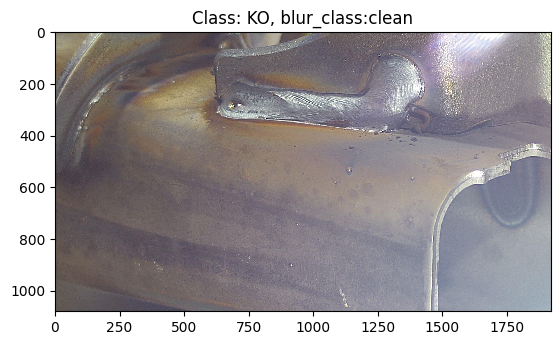

In [16]:
img = my_challenge_UI.display_image(meta_df, index=129, show_info=True)

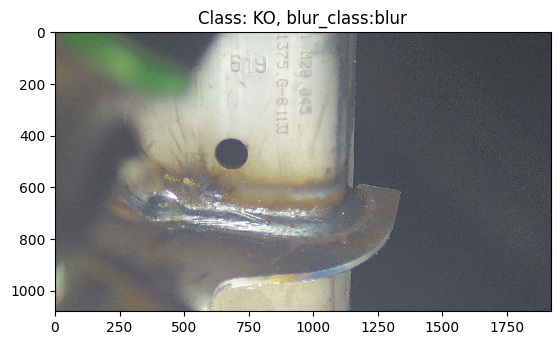

In [17]:
img = my_challenge_UI.display_image(meta_df, index=134, show_info=False)

## Check dataset integrity

Get the sha256 of each image file and compare it to those stored in its metadata. All anomalies ares stored in a Yaml file named  anomalous_samples_list.yml and returned as output of the method check_integrity() . 

In [18]:
# Check integrity of all files in your dataset (this may take a while . .)

# anomlie_list=my_challenge_UI.check_integrity(ds_name)